this notebook gives the plots for temperature for the corresponding days that cyclones were present within the bounds of the data. 

since warm SST is one of the main catalysts of tropical cyclone formation and migration, looking at the contour plots of surface temperature could give some insight as to the behavior of a tropical cyclone, should one be predicted in the forecast.

# Define Datasets:

In [1]:
# import the necessary packages
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point
import matplotlib.pyplot as plt

In [2]:
# load in the dataset
file='/scratch/ldoyle4/subset/ts.nc'
ds = xr.open_dataset(file)

In [3]:
# create the hurricane dictionaries (idk if dictionary is the right word)
def august(month):
    return (month == 8)
def september(month):
    return (month == 9)
def october(month):
    return (month == 10)

In [4]:
ds_august = ds.sel(time=august(ds['time.month']))
ds_sept = ds.sel(time=september(ds['time.month']))
ds_october = ds.sel(time=october(ds['time.month']))

In [5]:
def eleven(year):
    return (year == 2011)
def twelve(year):
    return (year == 2012)
def thirteen(year):
    return (year == 2013)
def fourteen(year):
    return (year == 2014)
def fifteen(year):
    return (year == 2015)
def sixteen(year):
    return (year == 2016)

In [6]:
#august
aug_2011 = ds_august.sel(time=eleven(ds_august['time.year']))
aug_2012 = ds_august.sel(time=twelve(ds_august['time.year']))
aug_2013 = ds_august.sel(time=thirteen(ds_august['time.year']))
aug_2014 = ds_august.sel(time=fourteen(ds_august['time.year']))
aug_2015 = ds_august.sel(time=fifteen(ds_august['time.year']))
aug_2016 = ds_august.sel(time=sixteen(ds_august['time.year']))

In [7]:
#september
sept_2011 = ds_sept.sel(time=eleven(ds_sept['time.year']))
sept_2012 = ds_sept.sel(time=twelve(ds_sept['time.year']))
sept_2013 = ds_sept.sel(time=thirteen(ds_sept['time.year']))
sept_2014 = ds_sept.sel(time=fourteen(ds_sept['time.year']))
sept_2015 = ds_sept.sel(time=fifteen(ds_sept['time.year']))
sept_2016 = ds_sept.sel(time=sixteen(ds_sept['time.year']))

In [8]:
#october
oct_2011 = ds_october.sel(time=eleven(ds_october['time.year']))
oct_2012 = ds_october.sel(time=twelve(ds_october['time.year']))
oct_2013 = ds_october.sel(time=thirteen(ds_october['time.year']))
oct_2014 = ds_october.sel(time=fourteen(ds_october['time.year']))
oct_2015 = ds_october.sel(time=fifteen(ds_october['time.year']))
oct_2016 = ds_october.sel(time=sixteen(ds_october['time.year']))

In [51]:
#2011
def emily(day):
    return (day >= 6) & (day <= 7)
emily_days = aug_2011.sel(time=emily(aug_2011['time.day']))

def irene(day):
    return (day >= 25) & (day <= 27)
irene_days = aug_2011.sel(time=irene(aug_2011['time.day']))

def lee(day):
    return (day >= 2) & (day <= 5)
lee_days = sept_2011.sel(time=lee(sept_2011['time.day']))

In [52]:
#2012
def isaac(day):
    return (day>=27) & (day<=31)
isaac_days = aug_2012.sel(time=isaac(aug_2012['time.day']))

def sandy(day):
    return (day>=26) & (day<=28)
sandy_days = oct_2012.sel(time=sandy(oct_2012['time.day']))

In [53]:
#2013
def karen(day):
    return (day>=3) & (day<=6)
karen_days = oct_2013.sel(time=karen(oct_2013['time.day']))

In [54]:
#2014
def bertha(day):
    return (day>=4) & (day<=5)
bertha_days = aug_2014.sel(time=bertha(aug_2014['time.day']))

In [55]:
#2015
def joaquin(day):
    return (day>=2) & (day<=3)
joaquin_days = oct_2015.sel(time=joaquin(oct_2015['time.day']))
# As it turns out, October 1st 2015 occurs twice in the dataset for some reason,
#so even though Joaquin is on the 1st, I'm not able to plot it because the data from the actual hurricane
#track doesn't match up with the time coords

In [56]:
#2016
def hermine1(day):
    return (day>=28) & (day<=31)
hermine1_days = aug_2016.sel(time=hermine1(aug_2016['time.day']))

def hermine2(day):
    return (day>=1) & (day<=3)
hermine2_days = sept_2016.sel(time=hermine2(sept_2016['time.day']))

def julia(day):
    return (day>=13) & (day<=21)
julia_days = sept_2016.sel(time=julia(sept_2016['time.day']))

def matthew(day):
    return (day>=6) & (day<=8)
matthew_days = oct_2016.sel(time=matthew(oct_2016['time.day']))

# 2011 Plots

## Tropical Storm Emily

The following plot cell was used as a trial block to visualize the color levels of each day so I could have 1 colorbar for each subplot. I'm sure there's a more elegant approach but this is what I found worked for me.

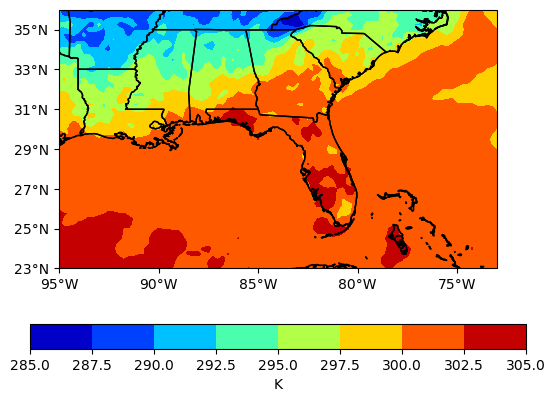

In [115]:
fig = plt.figure()

ax=plt.axes(projection=ccrs.PlateCarree())

cs=ax.contourf(ds.ts['longitude'],ds.ts['latitude'],matthew_days.ts[2,:,:],
            transform = ccrs.PlateCarree(),cmap='jet')
ax.set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
ax.coastlines()
        
ax.add_feature(feature.STATES)

cbar = plt.colorbar(cs, orientation='horizontal',label='K') 

Text(0.5, 0.98, 'surface temp for tropical storm emily')

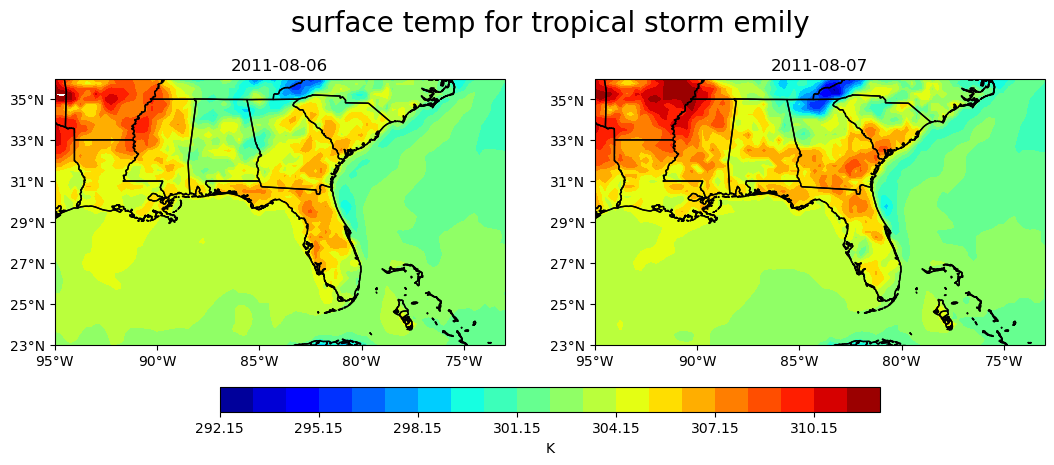

In [63]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=1,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,5))
clevs = np.arange(292.15,313,1) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,2):

        # Select the season
        data=emily_days.ts[i,:,:]

        # Contour plot
        cs=axs[i].contourf(ds.ts['longitude'],ds.ts['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(data['time.date'].values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        
        #.colorbar(cs)
        #axs[i].colorbar(cs, orientation='horizontal',label='K')
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.05])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='K')

# Add a big title at the top
plt.suptitle('surface temp for tropical storm emily',fontsize=20)

## Hurricane Irene

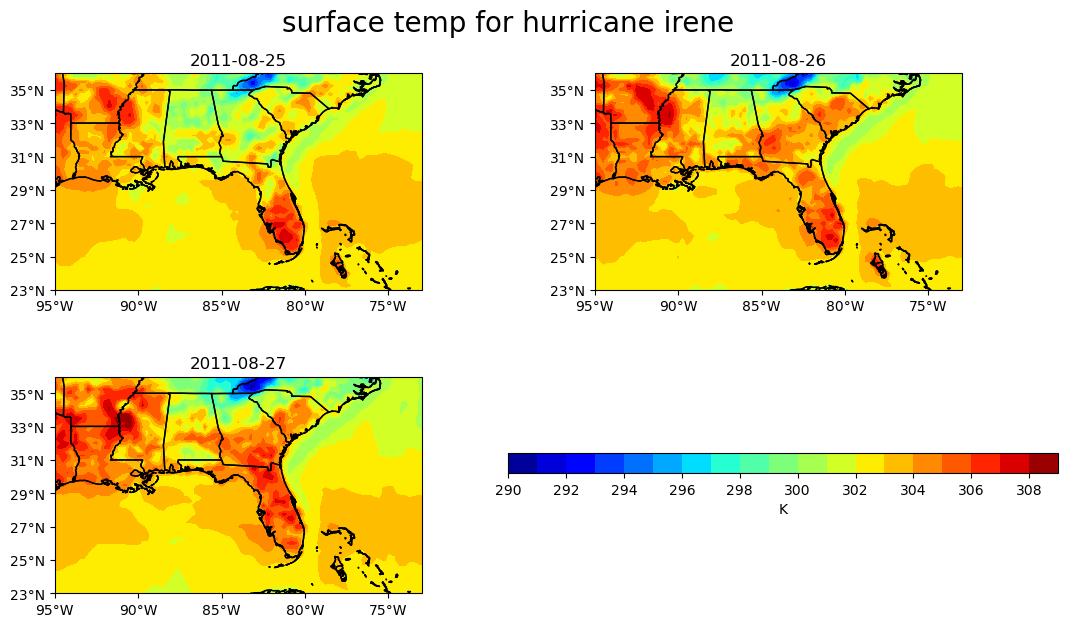

In [35]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8))
clevs = np.arange(290,310,1) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,3):

        # Select the season
        data=irene_days.ts[i,:,:]

        # Contour plot
        cs=axs[i].contourf(ds.ts['longitude'],ds.ts['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(data['time.date'].values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        
        #.colorbar(cs)
        #axs[i].colorbar(cs, orientation='horizontal',label='K')
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.4)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.5, 0.4, 0.5, 0.025])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='K')

# Add a big title at the top
plt.suptitle('surface temp for hurricane irene',fontsize=20)
axs[3].set_axis_off()

## Tropical Storm Lee

Text(0.5, 0.98, 'surface temp for tropical storm lee')

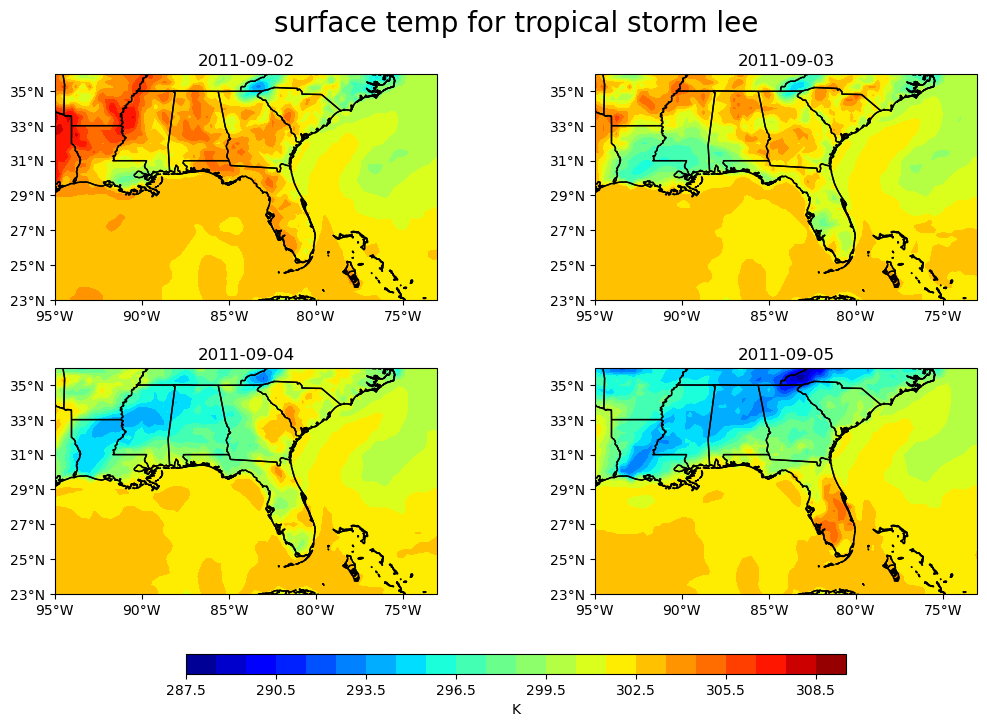

In [71]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8))
clevs = np.arange(287.5,310,1) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,4):

        # Select the season
        data=lee_days.ts[i,:,:]

        # Contour plot
        cs=axs[i].contourf(ds.ts['longitude'],ds.ts['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(data['time.date'].values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        
        #.colorbar(cs)
        #axs[i].colorbar(cs, orientation='horizontal',label='K')
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.3)

cbar_ax = fig.add_axes([0.2, 0.15, 0.6, 0.025])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='K')

# Add a big title at the top
plt.suptitle('surface temp for tropical storm lee',fontsize=20)

# 2012 Plots

## Hurricane Isaac

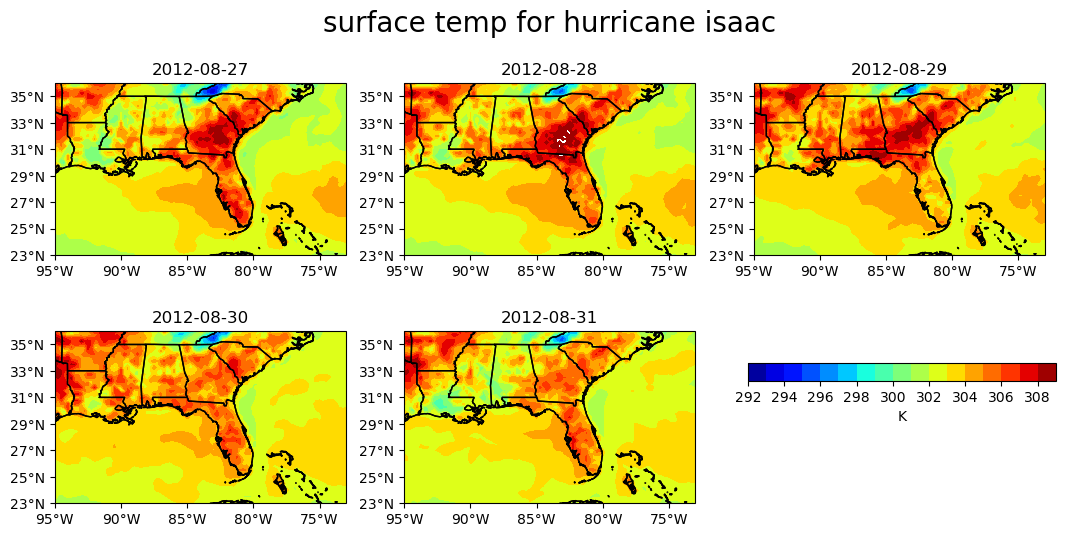

In [37]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,7))
clevs = np.arange(292,310,1) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,5):

        # Select the season
        data=isaac_days.ts[i,:,:]

        # Contour plot
        cs=axs[i].contourf(ds.ts['longitude'],ds.ts['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(data['time.date'].values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        
        #.colorbar(cs)
        #axs[i].colorbar(cs, orientation='horizontal',label='K')
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.2)

cbar_ax = fig.add_axes([0.68, 0.45, 0.28, 0.025])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='K')

# Add a big title at the top
plt.suptitle('surface temp for hurricane isaac',fontsize=20)
axs[5].set_axis_off()

## Hurricane Sandy

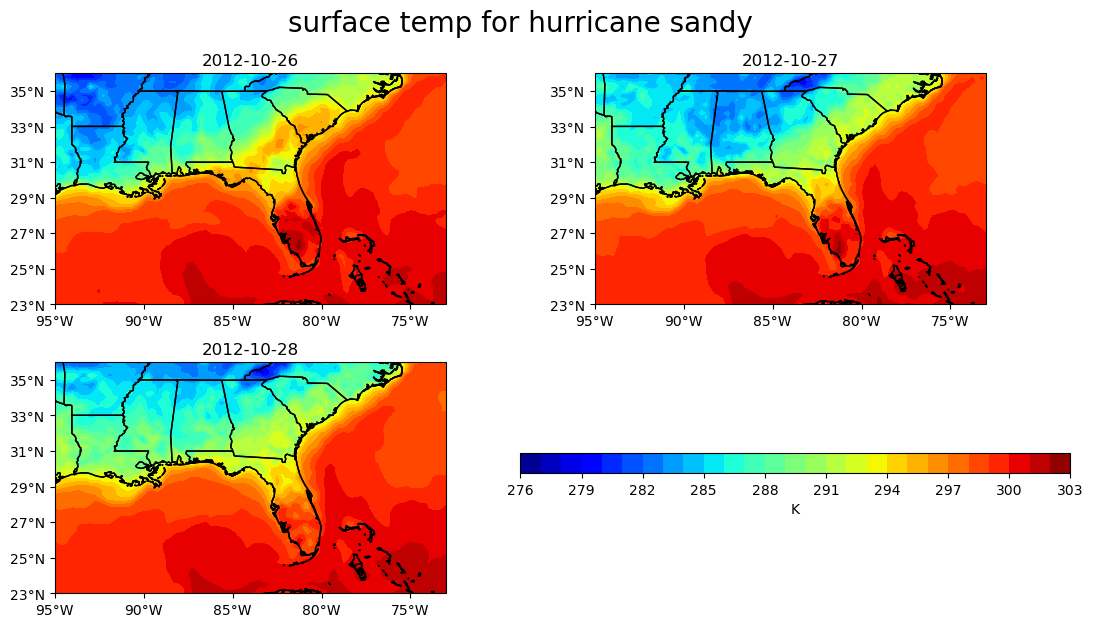

In [80]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8))
clevs = np.arange(276,304,1) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,3):

        # Select the season
        data=sandy_days.ts[i,:,:]

        # Contour plot
        cs=axs[i].contourf(ds.ts['longitude'],ds.ts['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(data['time.date'].values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        
        #.colorbar(cs)
        #axs[i].colorbar(cs, orientation='horizontal',label='K')
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.25)

cbar_ax = fig.add_axes([0.5, 0.4, 0.5, 0.025])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='K')

# Add a big title at the top
plt.suptitle('surface temp for hurricane sandy',fontsize=20)
axs[3].set_axis_off()

# 2013 Plots

## Tropical Storm Karen

Text(0.5, 0.98, 'surface temp for tropical storm karen')

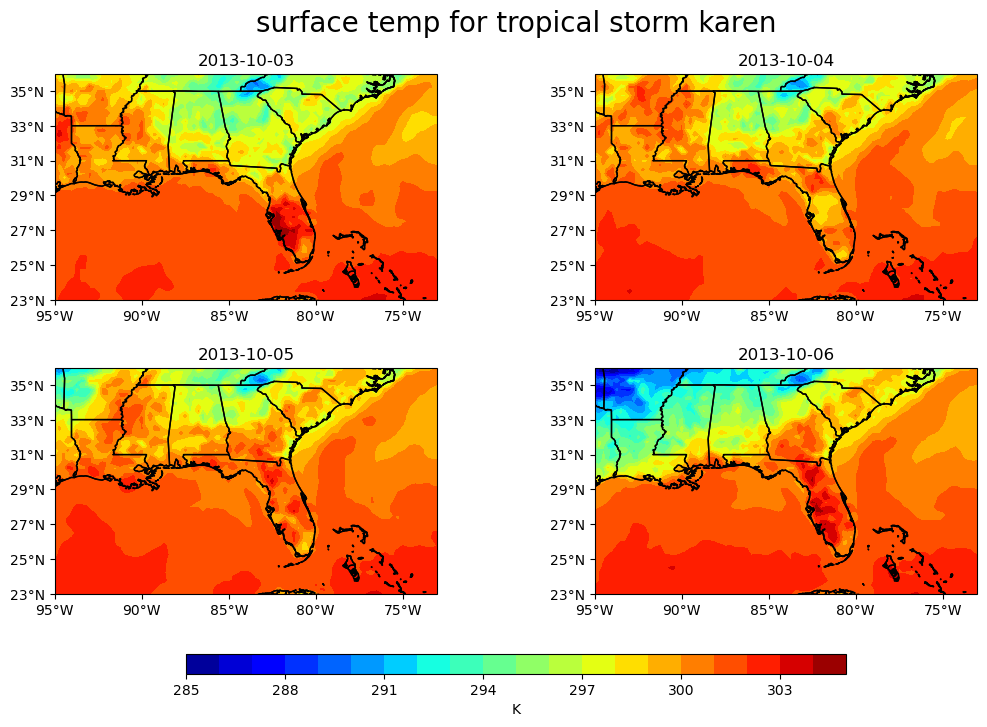

In [86]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8))
clevs = np.arange(285,306,1) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,4):

        # Select the season
        data=karen_days.ts[i,:,:]

        # Contour plot
        cs=axs[i].contourf(ds.ts['longitude'],ds.ts['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(data['time.date'].values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        
        #.colorbar(cs)
        #axs[i].colorbar(cs, orientation='horizontal',label='K')
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.3)

cbar_ax = fig.add_axes([0.2, 0.15, 0.6, 0.025])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='K')

# Add a big title at the top
plt.suptitle('surface temp for tropical storm karen',fontsize=20)

# 2014 Plots

## Tropical Storm Bertha

Text(0.5, 0.98, 'surface temp for tropical storm bertha')

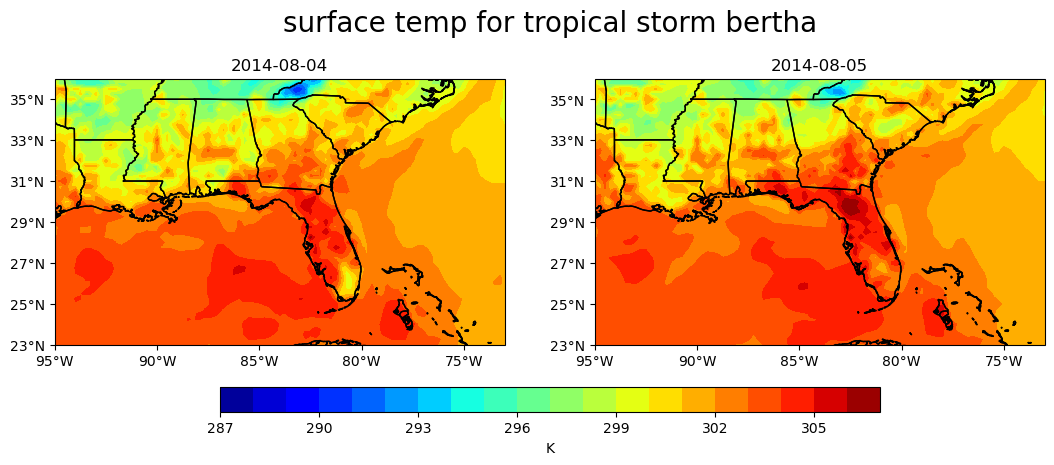

In [41]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=1,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,5))
clevs = np.arange(287,308,1) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,2):

        # Select the season
        data=bertha_days.ts[i,:,:]

        # Contour plot
        cs=axs[i].contourf(ds.ts['longitude'],ds.ts['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(data['time.date'].values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        
        #.colorbar(cs)
        #axs[i].colorbar(cs, orientation='horizontal',label='K')
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.05])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='K')

# Add a big title at the top
plt.suptitle('surface temp for tropical storm bertha',fontsize=20)

# 2015 Plots

## Hurricane Joaquin

Text(0.5, 0.98, 'surface temp for hurricane joaquin')

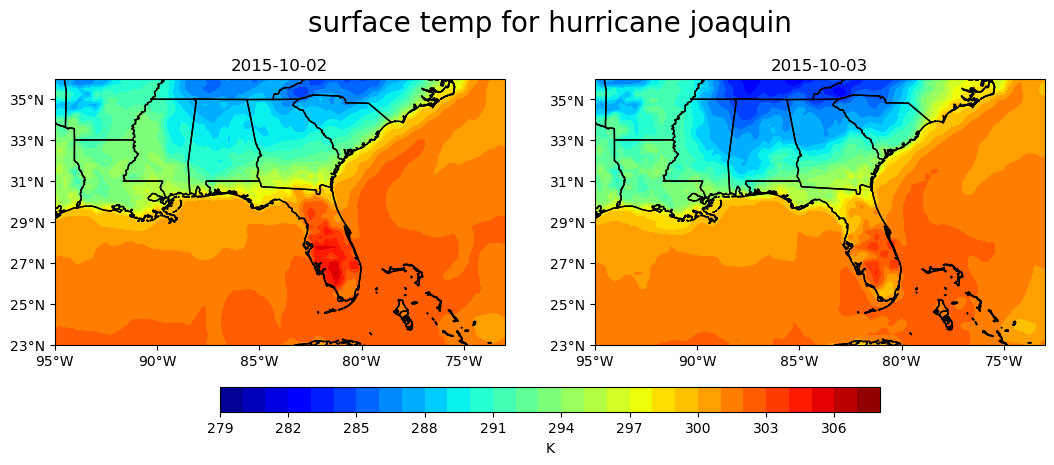

In [42]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=1,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,5))
clevs = np.arange(279,309,1) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,2):

        # Select the season
        data=joaquin_days.ts[i,:,:]

        # Contour plot
        cs=axs[i].contourf(ds.ts['longitude'],ds.ts['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(data['time.date'].values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        
        #.colorbar(cs)
        #axs[i].colorbar(cs, orientation='horizontal',label='K')
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.4)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.05])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='K')

# Add a big title at the top
plt.suptitle('surface temp for hurricane joaquin',fontsize=20)

# 2016 Plots

## Hurricane Hermine

Text(0.5, 0.98, 'surface temp for hurricane hermine, august')

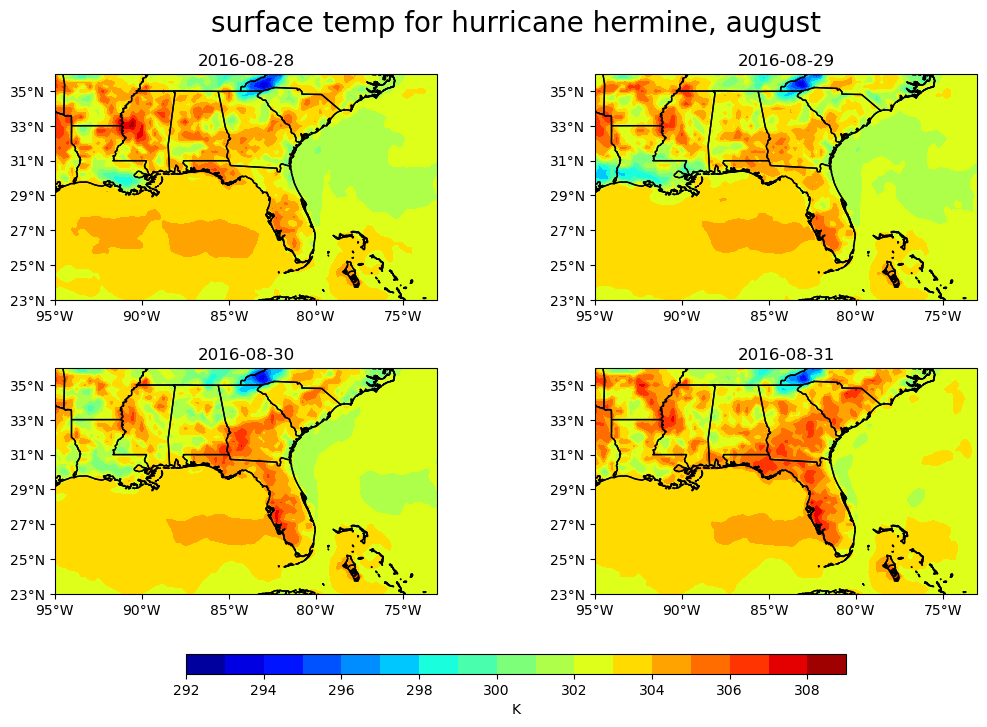

In [44]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8))
clevs = np.arange(292,310,1) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,4):

        # Select the season
        data=hermine1_days.ts[i,:,:]

        # Contour plot
        cs=axs[i].contourf(ds.ts['longitude'],ds.ts['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(data['time.date'].values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        
        #.colorbar(cs)
        #axs[i].colorbar(cs, orientation='horizontal',label='K')
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.3)

cbar_ax = fig.add_axes([0.2, 0.15, 0.6, 0.025])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='K')

# Add a big title at the top
plt.suptitle('surface temp for hurricane hermine, august',fontsize=20)

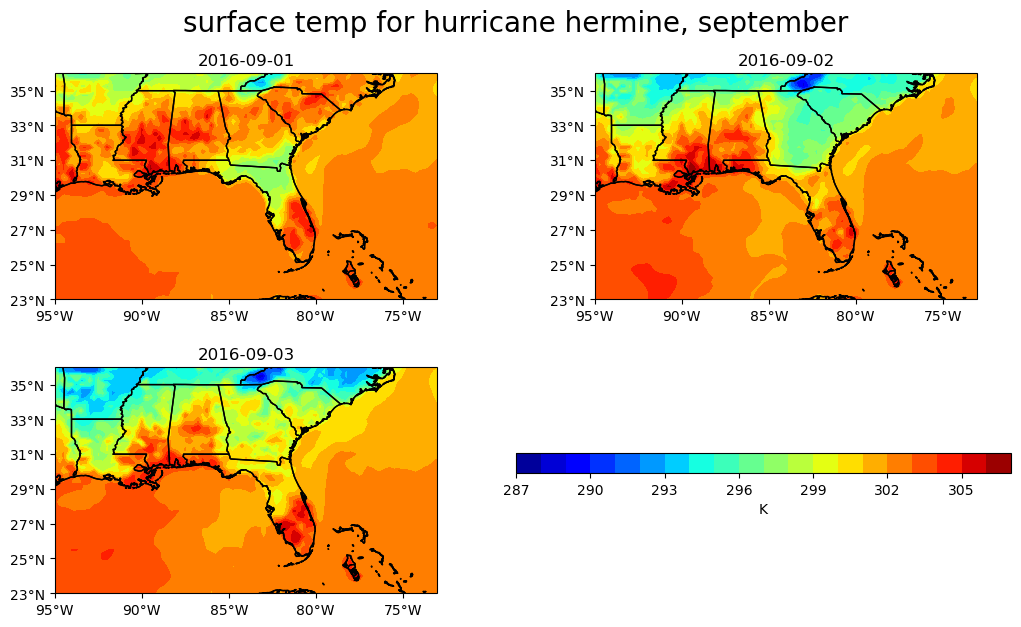

In [100]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8))
clevs = np.arange(287,308,1) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,3):

        # Select the season
        data=hermine2_days.ts[i,:,:]

        # Contour plot
        cs=axs[i].contourf(ds.ts['longitude'],ds.ts['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(data['time.date'].values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        
        #.colorbar(cs)
        #axs[i].colorbar(cs, orientation='horizontal',label='K')
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.3)

cbar_ax = fig.add_axes([0.5, 0.4, 0.45, 0.025])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='K')

# Add a big title at the top
plt.suptitle('surface temp for hurricane hermine, september',fontsize=20)
axs[3].set_axis_off()

## tropical storm julia

Text(0.5, 0.98, 'surface temp for tropical storm julia')

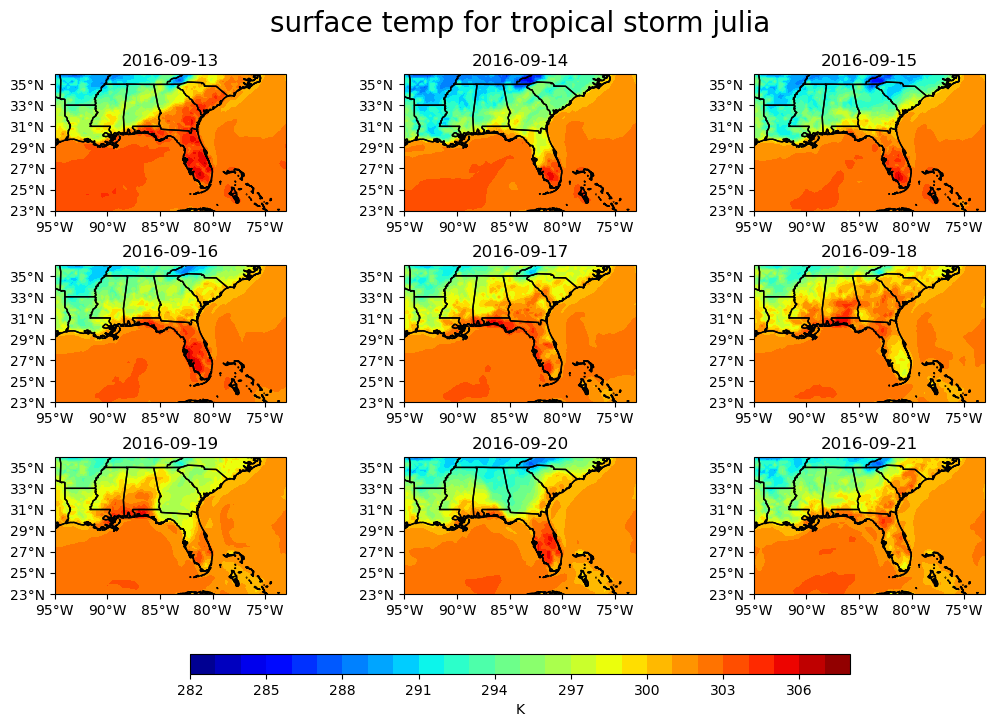

In [110]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=3,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8))
clevs = np.arange(282,309,1) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,9):

        # Select the season
        data=julia_days.ts[i,:,:]

        # Contour plot
        cs=axs[i].contourf(ds.ts['longitude'],ds.ts['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(data['time.date'].values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        
        #.colorbar(cs)
        #axs[i].colorbar(cs, orientation='horizontal',label='K')
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.4)

cbar_ax = fig.add_axes([0.2, 0.15, 0.6, 0.025])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='K')

# Add a big title at the top
plt.suptitle('surface temp for tropical storm julia',fontsize=20)

## Hurricane Matthew

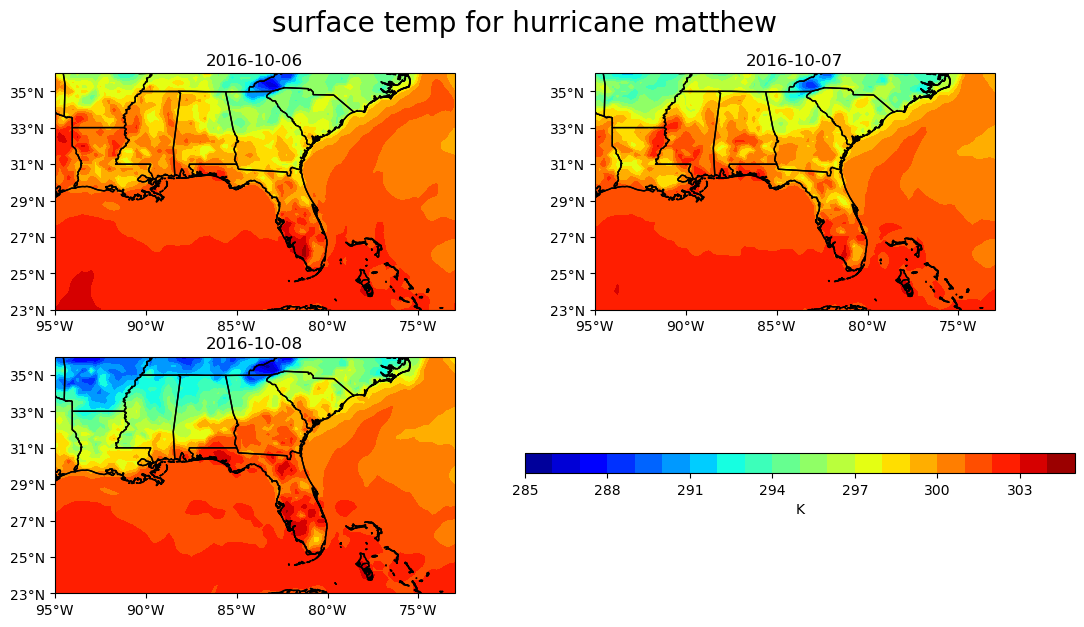

In [117]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8))
clevs = np.arange(285,306,1) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,3):

        # Select the season
        data=matthew_days.ts[i,:,:]

        # Contour plot
        cs=axs[i].contourf(ds.ts['longitude'],ds.ts['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(data['time.date'].values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        
        #.colorbar(cs)
        #axs[i].colorbar(cs, orientation='horizontal',label='K')
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.2)

cbar_ax = fig.add_axes([0.5, 0.4, 0.5, 0.025])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='K')

# Add a big title at the top
plt.suptitle('surface temp for hurricane matthew',fontsize=20)

axs[3].set_axis_off()

# Observations:
* Emily: relative ts of about 28 C, favorable temperatures for cyclonic activity.
* Irene: relative ts of about 28.9 C
* Lee: approaching 30 C within the Gulf

Anyway, all of the plots show warm surface temperatures in the regions where tropical cyclones are likely to migrate to.